# Machine Learning Project: Predicting QB Week 9 Points based on Previous Week Data from 2017, 2018, & 2019

## Importing Modules

In [36]:
#!/usr/bin/env python
# coding: utf-8


#import modules for scikit learn, data frame viewing, etc. 
import math
import io
import pandas as pd  
import numpy as np  
import matplotlib
import matplotlib.pyplot as pp 
import statsmodels.api as sm
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import linear_model
from statsmodels.api import OLS
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import scipy.stats
import scipy.optimize
import scipy.spatial
from sklearn import preprocessing
from sklearn.linear_model import ElasticNetCV
import numpy as np
from yellowbrick.regressor import AlphaSelection
import pandas_profiling

## Loading in Dataset 

In [37]:
#reads in csv file, data extracted using Scott's scraper
dataset = pd.read_csv('/Users/kushgulati/Desktop/Memorable-Code/ML Programs/Fantasy Football/ff_dataWeeklyQB.csv')
#prints description for our data set
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 60)
dataset.sort_values(by=['l_ppgcurrent'])


df = pd.DataFrame(dataset)
df.sort_values(by=['l_ppgcurrent'], ascending=False)

,l_name,l_team,l_pos,l_proj,l_points1,l_points2,l_points3,l_points4,l_points5,l_points6,l_points7,l_points8,l_points9,l_ppgcurrent,l_pointspg18,l_passydpg18,l_passtdpg18,l_passintpg18,l_rushydpg18,l_rushtdpg18,l_rush1stpg18,l_2ptpg18,l_fumblepg18,l_touchdown18,l_runnerQB18,...,l_rush1stpg17,l_2ptpg17,l_fumblepg17,l_touchdown17,l_runnerQB17,opp_1,opp_2,opp_3,opp_4,opp_5,opp_6,opp_7,opp_8,opp_9,opp_10,opp_11,opp_12,opp_13,opp_14,opp_15,opp_16,opp_17,good_opp,med_opp,bad_opp
21,Lamar Jackson,Bal,QB,12,33.56,36.88,22.28,29.480000,15.44,34.640,27.320000,28.514286,29.62,28.640000,12.033750,75.062500,0.375000,0.187500,43.437500,0.312500,2.812500,0.000000,0.250000,0.472656,2168.066400,...,0.932311,0.078068,0.178512,2.968417,384.356491,3,3,2,2,1,3,3,0,1,3,3,1,1,1,2,2,1,6,4,6
30,Russell Wilson,Sea,QB,17,16.60,25.20,41.34,14.300000,31.92,28.900,16.340000,15.680000,40.22,25.610000,20.174375,215.500000,2.187500,0.437500,23.500000,0.000000,1.437500,0.062500,0.125000,4.785156,621.878906,...,2.187500,0.125000,0.187500,5.347656,1521.000000,3,1,2,3,1,2,2,3,3,1,0,2,2,1,2,3,1,5,6,5
9,Deshaun Watson,Hou,QB,5,30.72,11.86,26.84,11.600000,44.74,28.400,16.520000,31.760000,21.74,24.910000,22.168750,260.312500,1.625000,0.562500,34.437500,0.312500,2.062500,0.000000,0.187500,3.753906,1355.160200,...,2.000000,0.285714,0.142857,9.000000,1657.653061,2,2,1,2,3,2,2,3,2,0,2,2,1,1,2,3,2,3,10,3
7,Dak Prescott,Dal,QB,28,35.40,30.66,21.54,8.620000,25.22,17.220,20.560000,22.745714,22.48,22.720000,18.681250,242.812500,1.375000,0.500000,19.062500,0.375000,1.562500,0.125000,0.375000,3.063000,441.000000,...,1.812500,0.000000,0.187500,3.062500,600.250000,3,2,3,2,1,2,2,0,3,2,3,1,1,1,1,2,2,4,7,5
0,Aaron Rodgers,GB,QB,25,12.92,14.36,13.30,28.480000,9.42,19.320,42.760000,28.100000,12.94,20.180000,20.536250,277.625000,1.562500,0.125000,16.812500,0.125000,1.250000,0.187500,0.187500,2.847656,330.785156,...,1.428571,0.000000,0.142857,5.224490,377.469388,1,2,1,2,1,3,3,2,1,2,0,1,3,2,1,2,3,4,6,6
20,Kyler Murray,Ari,QB,55,21.62,16.36,22.82,16.340000,27.42,31.800,8.960000,10.100000,24.04,19.940000,18.006404,247.353705,1.644649,0.699824,13.871170,0.125531,1.122973,0.093000,0.209687,3.487112,378.598452,...,0.929040,0.068238,0.186603,3.083280,391.137030,3,2,2,3,3,3,3,2,1,3,1,0,1,1,2,3,1,7,4,5
24,Matthew Stafford,Det,QB,79,29.60,16.10,12.14,24.440000,20.57,12.500,28.560000,3.380000,24.84,19.130000,13.761250,236.062500,1.312500,0.687500,4.437500,0.000000,0.500000,0.000000,0.250000,1.722656,24.378906,...,0.562500,0.125000,0.437500,3.285156,44.722656,3,1,2,2,0,1,2,3,3,1,1,2,1,2,3,1,1,4,5,7
14,Jameis Winston,TB,QB,26,8.06,14.22,25.50,29.300000,17.46,12.100,17.773333,22.340000,22.20,18.770000,19.343636,272.000000,1.727273,1.272727,25.545455,0.090909,1.727273,0.000000,0.272727,3.305785,748.768595,...,0.538462,0.076923,0.538462,2.366864,121.000000,1,2,3,1,2,2,0,2,3,3,2,3,2,2,3,3,3,7,7,2
18,Josh Allen,Buf,QB,68,16.96,21.22,21.32,8.720000,19.46,17.536,23.280000,20.260000,18.60,18.600000,18.006404,247.353706,1.644649,0.699824,13.871170,0.125531,1.122973,0.093000,0.209687,3.487112,378.598452,...,0.929040,0.068238,0.186603,3.083280,391.137030,2,2,3,1,2,0,3,2,2,2,3,1,1,2,1,1,2,3,8,5
5,Carson Wentz,Phi,QB,32,28.02,17.54,22.66,21.700000,12.06,21.540,7.840000,17.380000,16.06,18.310000,18.502727,279.454545,1.909091,0.636364,8.454545,0.000000,0.818182,0.090909,0.545455,3.644628,85.983471,...,2.000000,0.307692,0.230769,6.443787,625.000000,2,3,3,1,2,2,1,1,1,0,1,3,3,3,2,1,3,6,4,6


## Dropping Missing Values 

In [38]:
dataset=dataset.dropna()
dataset.describe()

,l_proj,l_points1,l_points2,l_points3,l_points4,l_points5,l_points6,l_points7,l_points8,l_points9,l_ppgcurrent,l_pointspg18,l_passydpg18,l_passtdpg18,l_passintpg18,l_rushydpg18,l_rushtdpg18,l_rush1stpg18,l_2ptpg18,l_fumblepg18,l_touchdown18,l_runnerQB18,l_pointspg17,l_passydpg17,l_passtdpg17,...,l_rush1stpg17,l_2ptpg17,l_fumblepg17,l_touchdown17,l_runnerQB17,opp_1,opp_2,opp_3,opp_4,opp_5,opp_6,opp_7,opp_8,opp_9,opp_10,opp_11,opp_12,opp_13,opp_14,opp_15,opp_16,opp_17,good_opp,med_opp,bad_opp
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,...,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.0000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,99.685714,17.796571,14.702000,14.306000,12.108381,12.692286,13.763771,13.957810,13.087959,12.646000,13.896601,18.006404,247.353705,1.644649,0.699824,13.871170,0.125531,1.122973,0.093000,0.209687,3.487139,378.598454,16.579627,232.978800,1.571763,...,0.929040,0.068238,0.186603,3.083280,391.137030,2.057143,2.0000,2.028571,1.857143,1.828571,1.828571,1.800000,1.885714,1.685714,1.685714,1.771429,1.742857,2.057143,1.914286,2.028571,2.057143,1.971429,5.085714,6.028571,4.885714
std,172.471101,8.284570,8.976244,10.289163,10.192831,11.580059,10.580785,10.715338,9.803144,11.015147,7.288525,3.765686,59.823898,0.539235,0.292187,10.481471,0.101550,0.613171,0.086153,0.123191,1.857778,480.369019,3.639345,37.519095,0.434163,...,0.634698,0.072660,0.110147,1.587304,526.552619,0.802308,0.8044,0.785370,0.912103,0.890661,0.984758,1.023259,0.963188,1.022437,1.131668,0.972738,0.980482,0.802308,0.817868,0.785370,0.802308,0.785370,1.442454,1.671310,1.622841
min,4.000000,5.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777778,4.951875,4.000000,0.000000,0.062500,0.437500,0.000000,0.062500,0.000000,0.000000,0.015625,0.250000,4.968571,76.714286,0.583333,...,0.062500,0.000000,0.000000,0.510204,0.003906,1.000000,1.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000
25%,29.000000,10.820000,10.310000,4.925000,0.440000,1.000000,3.660000,4.800000,3.290000,0.000000,8.675778,16.461222,242.656250,1.387500,0.598214,6.437500,0.062500,0.741667,0.000000,0.125000,2.403828,53.041016,15.420337,231.867353,1.406250,...,0.487981,0.000000,0.160685,2.404135,33.563550,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,5.000000,4.000000
50%,54.000000,16.600000,15.000000,15.100000,13.460000,11.940000,12.600000,13.370000,12.600000,12.940000,15.800000,18.006404,253.062500,1.644649,0.699824,13.871170,0.125000,1.122973,0.093000,0.209687,3.487112,330.785156,16.579627,232.978800,1.562500,...,0.929040,0.068238,0.186603,3.062500,384.356491,2.000000,2.0000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,6.000000,5.000000
75%,82.000000,25.120000,18.870000,21.670000,21.190000,20.260000,20.540000,20.870000,21.300000,21.520000,18.455000,20.302188,273.038194,1.918831,0.775000,18.000000,0.165179,1.240385,0.133929,0.250000,3.876953,396.869538,17.509375,253.569231,1.718750,...,0.966155,0.078068,0.200000,3.184218,391.137030,3.000000,3.0000,3.000000,3.000000,2.500000,3.000000,3.000000,3.000000,2.500000,3.000000,2.500000,2.500000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,7.000000,6.000000
max,914.000000,35.400000,36.880000,41.340000,29.480000,44.740000,34.640000,42.760000,31.760000,40.220000,28.640000,26.942500,320.562500,3.125000,1.500000,43.437500,0.

In [39]:
#describes values chosen 
vals = "l_points1,l_points2,l_points3,l_points4,l_points5,l_points6,l_points7,l_points8,l_points9,l_ppgcurrent,l_pointspg18,l_passydpg18,l_passtdpg18,l_passintpg18,l_rushydpg18,l_rushtdpg18,l_rush1stpg18,l_2ptpg18,l_fumblepg18,l_touchdown18,l_runnerQB18,l_pointspg17,l_passydpg17,l_passtdpg17,l_passintpg17,l_rushydpg17,l_rushtdpg17,l_rush1stpg17,l_2ptpg17,l_fumblepg17,l_touchdown17,l_runnerQB17,opp_9"
vals = vals.split(",")

## Removing Features w/ Pandas Profiling

In [40]:
#PANDAS PROFILING

# hold out random portion for test
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]
 
#%%
# take a look at the data
profile = train.profile_report()
profile.to_file(output_file='QBreport.html')

In [41]:
vals.remove("l_rush1stpg18")
vals.remove("l_rush1stpg17")


## Histogram Visualization

,l_points9,Value
0,mean,12.646
1,median,12.940


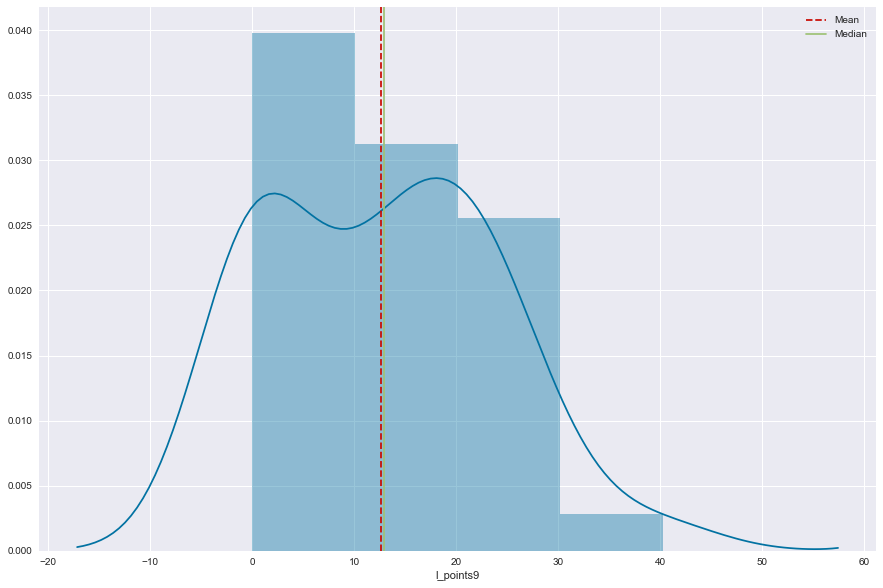

In [42]:
#predictors
X = dataset[vals].values


#target variable
y = dataset['l_points9'].values

#Plot creation
pp.figure(figsize=(15,10))
pp.tight_layout()

seabornInstance.distplot(dataset['l_points9'])
mean=dataset['l_points9'].mean()
median=dataset['l_points9'].median()

pp.axvline(mean, color='r', linestyle='--')
pp.axvline(median, color='g', linestyle='-')


pp.legend({'Mean':mean,'Median':median})

mmm = pd.DataFrame({'l_points9': ['mean', 'median'], 'Value': [mean, median]})
display(mmm)

## Split Data Into Training and Test Set

In [43]:
#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scale Training and Test Data

In [44]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Ordinary Least Squares Regression (pre-ElasticNet)

In [45]:
# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.409
Model:                            OLS   Adj. R-squared (uncentered):            -15.543
Method:                 Least Squares   F-statistic:                            0.02565
Date:                Sat, 23 Nov 2019   Prob (F-statistic):                        1.00
Time:                        17:56:17   Log-Likelihood:                         -111.38
No. Observations:                  28   AIC:                                      276.8
Df Residuals:                       1   BIC:                                      312.7
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1928     81.479     -0.002      0.998   -1035.476    1035.090
x2            -0.1826     97.714     -0.002      0.999   -1241.762    1241.397
x3            -0.2698     73.090     -0.004      0.998    -928.967     928.427
x4            -0.2296     67.012     -0.003      0.998    -851.697     851.238
x5            -0.2064     61.651     -0.003      0.998    -783.551     783.138
x6            -0.1766     36.151     -0.005      0.997    -459.515     459.161
x7            -0.2345     48.870     -0.005      0.997    -621.182     620.713
x8            -0.2116     56.867     -0.004      0.998    -722.779     722.356
x9            10.4811     46.067      0.228      0.858    -574.861     595.823
x10            1.4401     11.974      0.120      0.924    -150.710     153.590
x11           -0.2636    287.502     -0.001      0.999   -3653.324    3652.797
x12            0.1745    240.236      0.001      1.000   -3052.317    3052.666
x13            0.0390    174.569      0.000      1.000   -2218.069    2218.147
x14           -0.0428     67.183     -0.001      1.000    -853.687     853.601
x15            0.3422    174.102      0.002      0.999   -2211.831    2212.515
x16         3.637e-05     67.673   5.37e-07      1.000    -859.862     859.862
x17            0.0450     45.913      0.001      0.999    -583.329     583.420
x18           -0.0082     76.503     -0.000      1.000    -972.077     972.060
x19            0.0457    154.835      0.000      1.000   -1967.318    1967.410
x20           -0.1972    250.300     -0.001      0.999   -3180.562    3180.168
x21           -0.1990    193.010     -0.001      0.999   -2452.621    2452.223
x22            0.0573    139.155      0.000      1.000   -1768.081    1768.196
x23            0.2245    179.263      0.001      0.999   -2277.534    2277.983
x24           -0.0454     36.376     -0.001      0.999    -462.243     462.152
x25           -0.0452    252.298     -0.000      1.000   -3205.799    3205.709
x26            0.0505     78.005      0.001      1.000    -991.092     991.193
x27            0.0457     52.237      0.001      0.999    -663.687     663.779
x28           -0.0090     40.791     -0.000      1.000    -518.314     518.296
x29           -0.1393    238.567     -0.001      1.000   -3031.415    3031.137
x30            0.1047    321.076      0.000      1.000   -4079.557    4079.766
x31            0.0043     30.095      0.000      1.000    -382.387     382.395
==============================================================================
Omnibus:                        4.077   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.130   Jarque-Bera (JB):                2.520
Skew:                           0.674   Prob(JB):            

## Elastic Net Cross Validation 

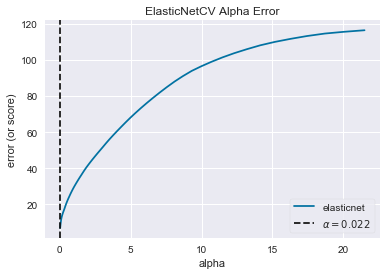

In [46]:
#Cross Validation for Elastic Model
ElasticModel = ElasticNetCV(l1_ratio=0.5, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv='warn', copy_X=True, verbose=0, n_jobs=None)
ElasticVisualizer = AlphaSelection(ElasticModel)
ElasticVisualizer.fit(X_train, y_train)
ElasticVisualizer.show()

## Elastic Net: Coefficients, MSE, & Residuals

In [47]:
#Prints ElasticNet Actual vs Predicted in Tabular Format 

print("ElasticNet Predict with transformations:")
clf = linear_model.ElasticNet(alpha=.107, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


coefs = pd.DataFrame(clf.coef_, vals)
display(coefs)


print("Intercept: " + str(clf.intercept_))



ElasticNet Predict with transformations:


,0
l_points1,-0.071643
l_points2,-0.000000
l_points3,0.000000
l_points4,-0.161302
l_points5,0.000000
l_points6,0.370318
l_points7,0.221275
l_points8,0.175029
l_points9,8.860265
l_ppgcurrent,0.937259


Intercept: 12.920357142857146


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.09828510080171
Mean Squared Error: 1.7502797734989366
Root Mean Squared Error: 1.3229813957493646


In [49]:
print("Elastic Residuals")
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

with pd.option_context("display.max_rows", 100):
    display(dfElastic)

Elastic Residuals


,Actual,Predicted
0,0.00,-0.532475
1,24.04,22.730603
2,28.88,26.423260
3,11.76,11.841491
4,0.00,0.489317
5,16.16,14.744426
6,0.00,-1.403002


Elastic Graph


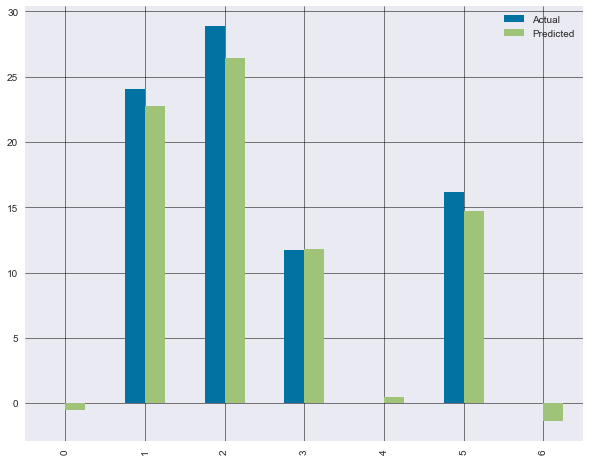

In [50]:
print("Elastic Graph")
dfElastic.plot(kind='bar',figsize=(10,8))
pp.grid(which='major', linestyle='-', linewidth='0.5', color='black')
pp.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
pp.show()

# Elastic Net Bootstrap (Iterations = 10000): Coefficients & MSE 

In [51]:
import numpy as np
import statistics
from statistics import mean
from statistics import stdev
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
bootstrap_iter = 10000    # designate the number of iterations for bootstrapping

accuracy = []
coefs = []
intercepts = []
clf = linear_model.ElasticNet(alpha=.093, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001,  selection='cyclic')

for i in range(bootstrap_iter):
    X_, y_ = resample(X_train, y_train)
    clf.fit(X_, y_)
    y_pred = clf.predict(X_test)
    acc = metrics.mean_squared_error(y_test, y_pred)
    accuracy.append(acc)
    coefs.append(clf.coef_)
    intercepts.append(clf.intercept_)
    

average = []
for i in range(len(clf.coef_)):
    avg =0
    for j in range(len(coefs)):
        avg += coefs[j][i]
    average.append(avg)


for x in range(len(average)):
    average[x] = average[x]/12


avgs = pd.DataFrame({'Average Coefficients': clf.coef_, 'Values': vals})

display(avgs)
                



,Average Coefficients,Values
0,-0.221028,l_points1
1,0.000000,l_points2
2,0.225178,l_points3
3,-0.319633,l_points4
4,0.599167,l_points5
5,0.601647,l_points6
6,0.481983,l_points7
7,0.407376,l_points8
8,7.097299,l_points9
9,1.135314,l_ppgcurrent


In [52]:
MSE = mean(accuracy)
print('Average Intercept:', np.mean(intercepts))
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', np.sqrt(MSE))

Average Intercept: 12.760443874809578
Mean Squared Error: 9.773960133736878
Root Mean Squared Error: 3.126333336951912
